In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.classes.function import path_weight
from tqdm import tqdm

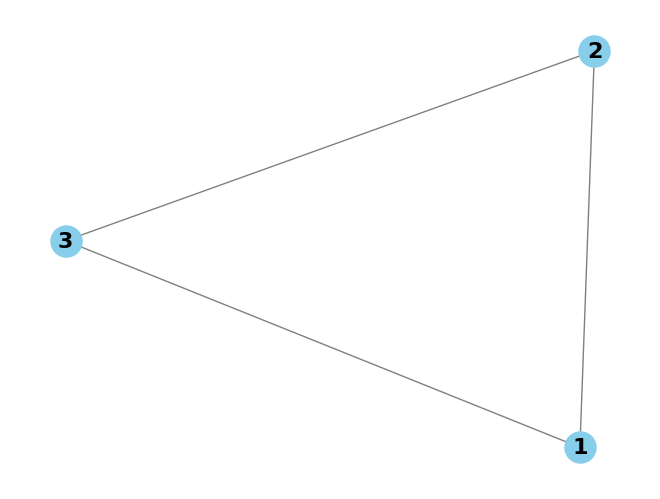

In [2]:
#  Exemplo de grafo simples

# Criação do grafo
G = nx.Graph()

# Adiciona nós
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Adiciona arestas entre os nós
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)

# Desenho do grafo
nx.draw(G, with_labels=True, node_color="skyblue", node_size=500, font_size=16, font_weight="bold", edge_color="gray")
plt.show()


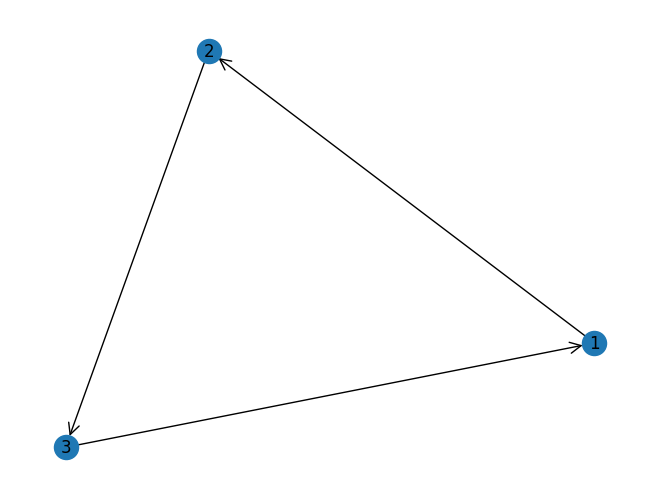

In [3]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 1)])  # Grafo com arestas direcionadas
nx.draw(G, with_labels=True, arrowstyle='->', arrowsize=20)
plt.show()


In [4]:
#  função criada pelo timber


def create_graph(transports):
    graph = {}

    # Creating the graph with the list of transports
    for i,transport in tqdm(transports.iterrows()):
        id_emp_orig = transport['node_src']
        id_emp_dest = transport['node_dest']

        volume = transport['vol']

        # Graph is a dict (source) -> (destination, weight)
        if graph.get(id_emp_orig) is None:
            # if source is not in the graph we need to map it as source to the destination
            graph[id_emp_orig] = {id_emp_dest: {'weight': volume }}
        else:
            # if source is already in the graph
            # 1. new destination from that source: create the edge
            # 2. source already mapped to destination: increase the volume in that edge
            if graph[id_emp_orig].get(id_emp_dest) is None:
                graph[id_emp_orig][id_emp_dest] = {'weight': volume }
            else:
                graph[id_emp_orig][id_emp_dest]['weight'] += volume

    # In this context we want to maximize paths over the volume
    # Since most functions minimizes over the weight of the edges,
    # we need to invert the relation
    for source, targets in graph.items():
        for target, volume in targets.items():
            graph[source][target]['weight'] = -1 * volume['weight']

    return nx.DiGraph(graph)

In [5]:
transportes_junho = pd.read_csv('../data/df_06.csv')

C:\Users\jaime\AppData\Local\Temp\ipykernel_19044\2086248568.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  transportes_junho = pd.read_csv('../data/df_06.csv')


In [6]:
transportes_junho.head()

,Unnamed: 0.1,index,Unnamed: 0,Codigo,Registro,TpRegistro,OrigemID,NomeOrigem,CPF_CNPJ_Rem,CTFOrigem,...,Produto,NomePopular,NomeCientifico,Unidade,Volume,DtEmissao,Ano,Status,NomePopularAgregado,ID
0,82,330,330,2649555542995653,17999737,DOF,PTO-75274423002738,COMERCIAL IVAIPORÃ LTDA,75274423002738,5391410,...,Portal ou Batente,Cambarápreto,Qualeaalbiflora,M3,0.0182,26/06/2017,2017,Emitido,Mandioqueiro,82
1,88,359,359,5433526297637879,17922851,DOF,PTO-20416094000191,P R RUELA DA SILVA MEDEIRA ME,20416094000191,6151285,...,Madeira serrada (tábua),Cambará,Qualeaspp,M3,0.0950,08/06/2017,2017,Emitido,Mandioqueiro,88
2,93,373,373,7199177566847824,17896848,DOF,PTO-01079926000187,MATELLI MATERIAIS DE CONSTRUÇÃO LTDA - ME,1079926000187,29249,...,Ripas,Amarelão,Qualeadinizii,M3,0.0176,03/06/2017,2017,Emitido,Mandioqueiro,93
3,94,374,374,7199177566847824,17896848,DOF,PTO-01079926000187,MATELLI MATERIAIS DE CONSTRUÇÃO LTDA - ME,1079926000187,29249,...,Madeira serrada (vigota),Cambarápreto,Qualeaalbiflora,M3,0.2310,03/06/2017,2017,Emitido,Mandioqueiro,94
4,96,378,378,9315915567121436,17896121,DOF,PTO-82273939000194,MATERIAIS DE CONSTRUCAO BUACHACK LTDA,82273939000194,1287725,...,Portal ou Batente,Mandioqueira,Qualeaacuminata,M3,0.0474,03/06/2017,2017,Emitido,Mandioqueiro,96


In [7]:
transportes_junho['TpDes'].value_counts()

TpDes
FINAL        17358
PTO_IBAMA     7694
Name: count, dtype: int64

In [8]:
transportes_junho['TpRem'].value_counts()

TpRem
PTO_IBAMA    24655
MANEJO         397
Name: count, dtype: int64

In [9]:
contagem_tipos_rem = transportes_junho.groupby('CPF_CNPJ_Rem').size()
contagem_tipos_rem

CPF_CNPJ_Rem
1746927909        3
2616690950        8
2737218870        3
3385469953        7
4494652253        6
                 ..
96575972000183    7
97138077000164    1
97297477000112    1
97520331000275    1
97520331000356    1
Length: 1864, dtype: int64

In [10]:
contagem_tipos_rem_id = transportes_junho.groupby('OrigemID').size()
contagem_tipos_rem_id 

OrigemID
MANEJO-01746927909(-9.864,-62.526)       3
MANEJO-02616690950(-9.678,-64.828)       8
MANEJO-02737218870(-8.626,-63.125)       3
MANEJO-03385469953(-7.682,-62.605)       6
MANEJO-03784107000166(-9.342,-63.609)    3
                                        ..
PTO-96575972000183                       7
PTO-97138077000164                       1
PTO-97297477000112                       1
PTO-97520331000275                       1
PTO-97520331000356                       1
Length: 1897, dtype: int64

In [11]:
contagem_tipos_des = transportes_junho.groupby('CPF_CNPJ_Des').size()
contagem_tipos_des 

CPF_CNPJ_Des
2656914            1
3572609            1
8686807            2
15915840           1
16478908           2
                  ..
95829131000192     4
95838611000110     3
97419683000158     2
97485593000165     1
97542692000131    16
Length: 13831, dtype: int64

In [12]:
contagem_tipos_des_id = transportes_junho.groupby('DestinoID').size()
contagem_tipos_des_id

DestinoID
FINAL-00008686807    2
FINAL-00015915840    1
FINAL-00016478908    2
FINAL-00017285470    1
FINAL-00022434909    1
                    ..
PTO-99419076920      4
PTO-99443554887      1
PTO-99453606804      1
PTO-99588439868      1
PTO-99790467591      1
Length: 13831, dtype: int64

Temos mais IDs de origem do que CNPJs de origem.
Já no caso dos CPF/CNPj dos destinatários, temos o mesmo número. 

In [13]:
#  Separando os nós pelo cnpj
transportes_junho.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'Codigo', 'Registro',
       'TpRegistro', 'OrigemID', 'NomeOrigem', 'CPF_CNPJ_Rem', 'CTFOrigem',
       'EntJuridica_Rem', 'TpRem', 'UFOrigem', 'MunOrigem', 'LatOrigem',
       'LongOrigem', 'DestinoID', 'NomeDestino', 'CPF_CNPJ_Des', 'CTFDestino',
       'EntJuridica_Des', 'TpDes', 'UFDestino', 'MunDestino', 'LatDestino',
       'LongDestino', 'Autorizacao', 'TpAutorizacao', 'Produto', 'NomePopular',
       'NomeCientifico', 'Unidade', 'Volume', 'DtEmissao', 'Ano', 'Status',
       'NomePopularAgregado', 'ID'],
      dtype='object')

In [14]:
transportes_junho['TpRem']

0        PTO_IBAMA
1        PTO_IBAMA
2        PTO_IBAMA
3        PTO_IBAMA
4        PTO_IBAMA
           ...    
25047    PTO_IBAMA
25048    PTO_IBAMA
25049    PTO_IBAMA
25050    PTO_IBAMA
25051    PTO_IBAMA
Name: TpRem, Length: 25052, dtype: object

In [15]:
transportes_junho[['CPF_CNPJ_Rem', 'CPF_CNPJ_Des','TpRem', 'TpDes' ]]

,CPF_CNPJ_Rem,CPF_CNPJ_Des,TpRem,TpDes
0,75274423002738,7865912935,PTO_IBAMA,FINAL
1,20416094000191,86510932253,PTO_IBAMA,FINAL
2,1079926000187,96654201,PTO_IBAMA,FINAL
3,1079926000187,96654201,PTO_IBAMA,FINAL
4,82273939000194,87725509968,PTO_IBAMA,FINAL
...,...,...,...,...
25047,613799000191,706719077,PTO_IBAMA,FINAL
25048,94543717000123,29203201068,PTO_IBAMA,FINAL
25049,89614101000166,50714082015,PTO_IBAMA,FINAL
25050,16480330000161,33579148087,PTO_IBAMA,FINAL


Criando Nós

In [33]:
rem_df = transportes_junho[['CPF_CNPJ_Rem', 'TpRem']].rename(columns={'CPF_CNPJ_Rem': 'CNPJ_CPF', 'TpRem': 'type'})
rem_df['source'] = 'Remetente'

# Criar DataFrame para CPF_CNPJ_Des e TpDes
des_df = transportes_junho[['CPF_CNPJ_Des', 'TpDes']].rename(columns={'CPF_CNPJ_Des': 'CNPJ_CPF', 'TpDes': 'type'})
des_df['source'] = 'Destinatário'

# Concatenar ambos os DataFrames
node_df= pd.concat([rem_df, des_df], ignore_index=True)
node_df.drop_duplicates('CNPJ_CPF')
node_df

,CNPJ_CPF,type,source
0,75274423002738,PTO_IBAMA,Remetente
1,20416094000191,PTO_IBAMA,Remetente
2,1079926000187,PTO_IBAMA,Remetente
3,1079926000187,PTO_IBAMA,Remetente
4,82273939000194,PTO_IBAMA,Remetente
...,...,...,...
50099,706719077,FINAL,Destinatário
50100,29203201068,FINAL,Destinatário
50101,50714082015,FINAL,Destinatário
50102,33579148087,FINAL,Destinatário


In [17]:
node_df['type'].value_counts()

type
PTO_IBAMA    32349
FINAL        17358
MANEJO         397
Name: count, dtype: int64

In [43]:
# reading nodes and creating a dict for easy use

emp_type = {}

for i,node in node_df.iterrows():
  emp_type[node['CNPJ_CPF']] = node['type']
emp_type

{75274423002738: 'PTO_IBAMA',
 20416094000191: 'PTO_IBAMA',
 1079926000187: 'PTO_IBAMA',
 82273939000194: 'PTO_IBAMA',
 77172161000197: 'PTO_IBAMA',
 85491520000105: 'PTO_IBAMA',
 9402361000139: 'PTO_IBAMA',
 25134467000155: 'PTO_IBAMA',
 74008137000129: 'PTO_IBAMA',
 8849597000155: 'PTO_IBAMA',
 85042737000120: 'PTO_IBAMA',
 8818299000106: 'PTO_IBAMA',
 10621489000172: 'PTO_IBAMA',
 2454083000114: 'PTO_IBAMA',
 1472550000176: 'PTO_IBAMA',
 10676499000105: 'PTO_IBAMA',
 6151106000172: 'PTO_IBAMA',
 2181280000107: 'PTO_IBAMA',
 73304982000189: 'PTO_IBAMA',
 3964825000114: 'PTO_IBAMA',
 7120780000152: 'PTO_IBAMA',
 470994000100: 'PTO_IBAMA',
 12453173000144: 'PTO_IBAMA',
 1473384000122: 'PTO_IBAMA',
 2928483000114: 'PTO_IBAMA',
 78943925000163: 'PTO_IBAMA',
 3407641000153: 'PTO_IBAMA',
 10953083000197: 'PTO_IBAMA',
 4385294000178: 'PTO_IBAMA',
 7728113000157: 'PTO_IBAMA',
 5672477000137: 'PTO_IBAMA',
 82252099000183: 'PTO_IBAMA',
 3699498000110: 'PTO_IBAMA',
 79779062000101: 'PTO_IBAMA',

Criando o dataframe com as arestas

In [19]:
volumes_transporte_junho = transportes_junho['Volume']*1000
volumes_transporte_junho

0         18.2
1         95.0
2         17.6
3        231.0
4         47.4
         ...  
25047    584.2
25048    488.0
25049     67.5
25050    632.0
25051    587.5
Name: Volume, Length: 25052, dtype: float64

In [20]:
volume_minimo_junho = transportes_junho['Volume'].min()
volume_maximo_junho =transportes_junho['Volume'].max()

print(f"Volume Mínimo registrado em Junho: {volume_minimo_junho}")
print(f"Volume Máximo registrado em Junho: {volume_maximo_junho}")

Volume Mínimo registrado em Junho: 0.0001
Volume Máximo registrado em Junho: 73.3894


In [21]:
arestas = transportes_junho[['CPF_CNPJ_Rem', 'CPF_CNPJ_Des', 'Volume']].rename(columns={'CPF_CNPJ_Rem': 'node_src', 'CPF_CNPJ_Des': 'node_dest', 'Volume': 'vol'})

In [ ]:
#  Removendo Laços
arestas

,node_src,node_dest,vol
0,75274423002738,7865912935,0.0182
1,20416094000191,86510932253,0.0950
2,1079926000187,96654201,0.0176
3,1079926000187,96654201,0.2310
4,82273939000194,87725509968,0.0474
...,...,...,...
25047,613799000191,706719077,0.5842
25048,94543717000123,29203201068,0.4880
25049,89614101000166,50714082015,0.0675
25050,16480330000161,33579148087,0.6320


In [35]:
arestas_1 = arestas[arestas['node_dest']!=arestas['node_src']]
arestas_1

,node_src,node_dest,vol
0,75274423002738,7865912935,0.0182
1,20416094000191,86510932253,0.0950
2,1079926000187,96654201,0.0176
3,1079926000187,96654201,0.2310
4,82273939000194,87725509968,0.0474
...,...,...,...
25047,613799000191,706719077,0.5842
25048,94543717000123,29203201068,0.4880
25049,89614101000166,50714082015,0.0675
25050,16480330000161,33579148087,0.6320


In [36]:
graph = create_graph(arestas_1)

0it [00:00, ?it/s]

24940it [00:00, 58479.78it/s]


In [24]:
# nx.draw(graph, with_labels=True, arrowstyle='->', arrowsize=20)
# plt.show()


In [37]:
graus = [grau for _, grau in graph.degree()]
graus = sorted(graus)
print(graus)
print(f"Grau Mínimo: {min(graus)}")
print(f"Grau Máximo: {max(graus)}")
print()


quantidade_de_uns = graus.count(1)
print(f"Quantidade de nós com grau 1: {quantidade_de_uns}")
print()
print()
Q1 = np.percentile(graus, 25)
Q3 = np.percentile(graus, 75)
interquartil = Q3 - Q1
print()
print()
print(f"Primeiro Quartil (Q1): {Q1}")
print(f"Terceiro Quartil (Q3): {Q3}")

lim_superior = interquartil * 1.5 + Q3

print(f"Limite Superior: {lim_superior}")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [38]:
G_orig_weight = graph.copy()

In [39]:
def get_concessions(list_nodes,emp_type): 
  # As concessões são todas emps marcadas como MANEJO,1
  # (fonte legal e extratores de madeira)

  count = 0
  for node in list_nodes:
    if emp_type[node] == 'MANEJO':
      count+=1

  return count

In [40]:
def print_graph_metrics(graph, emp_type):
  # Print overall graph metrics

  g_aux = G_orig_weight.to_undirected()

  # Number of connected components in the graph
  components_len = []
  for item in nx.connected_components(g_aux):
    components_len.append((len(item),item))

  print(f'Total Graph: {graph}')
  print(f'Number of components: {len(components_len)}')
  print(f'Number of concessions: {get_concessions(graph.nodes(),emp_type)}')

  print()
  print()
  print('Components with more than 1000 nodes')
  for c in components_len:
    if c[0] > 1000:
      subg = graph.subgraph(c[1])

      print(f'Subgraph: {subg}')
      print(f'Number of concessions: {get_concessions(subg.nodes(),emp_type)}')
      print()
      print()

In [41]:
print_graph_metrics(G_orig_weight, emp_type)

Total Graph: DiGraph with 15016 nodes and 14180 edges
Number of components: 964
Number of concessions: 47


Components with more than 1000 nodes
Subgraph: DiGraph with 6614 nodes and 6725 edges
Number of concessions: 19




In [42]:
print(f'Biggest component proportion: {round(6614  / 15016,2) * 100}%', )

Biggest component proportion: 44.0%


Isso significa que nas transações de junho, nós temos uma grande componente conexa com 40% de todos os nós do grafo. 

In [31]:
def get_sink_nodes(graph, emp_type):
  # If node is marked as FINAL, he is a sink
  # It is the final destination of the timber chain

  nodes = {}
  for node in graph.nodes():
    if emp_type[node] == 'FINAL':
      nodes[node] = 1
      continue

    # we consider sink nodes as final nodes or nodes that only transports to other final nodes
    not_sink = False
    for edge in graph.edges(node):
      if emp_type[edge[1]] != 'FINAL':
        not_sink=True

    if not not_sink:
      nodes[node] = 1

  return nodes

In [ ]:
#  função que retorna o dicionario com as empresa do tipo MANEJO

def get_concessions_nodes(nodes,)